# Make sweeps in the parameter space of the Mindlin model and create synthetic vocalizations

Uses a RK4 ode integrator to compute segments of synthetic vocaliations of zebra finch (after the Mindlin Model presented in Sanz, Arneodo, Amador, Mindlin 2011 and Arneodo, Sanz, Goller, Mindlin (2012).

Requires package swissknife (https://github.com/zekearneodo/swissknife)

In [1]:
# simmulate sounds in a grid of parameter values
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import spectrogram
import scipy.signal as sg
import socket
import os
import sys
import logging
import h5py
import copy


logger = logging.getLogger()
handler = logging.StreamHandler()
formatter = logging.Formatter(
        '%(asctime)s %(name)-12s %(levelname)-8s %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)
logger.setLevel(logging.DEBUG)

# Check wich computer to decide where the things are mounted
comp_name=socket.gethostname()
logger.info('Computer: ' + comp_name)


#setup the data folder
from swissknife.h5tools import h5tools
from swissknife.h5tools import tables
from swissknife.dynamo import finch as zf
from swissknife.dynamo import takens as tk
from swissknife.bci.core import expstruct as es
from swissknife.threadtools import threadedfunction as td

def splitlist(a, n):
    k, m = len(a) / n, len(a) % n
    return (a[i * k + min(i, m):(i + 1) * k + min(i + 1, m)] for i in xrange(n))

def chunkify(lst,n):
    return [ lst[i::n] for i in xrange(n) ]

def sim_and_store(sim_pars, h5_file):
    sweep_group = h5_file.require_group(sim_pars['sweep_name'])
    h5tools.dict_2_group(sweep_group, sim_pars['vocal_pars'], 'vocal_pars')
    synth_group = sweep_group.require_group('synth')
    # create the group for the gamma
    gamma_group = synth_group.require_group('{0:5d}'.format(sim_pars['gamma']))
    sweep_table = tables.unlimited_rows_data(gamma_group, 'alpha_beta', 
                                             np.array([sim_pars['alpha'], 
                                                       sim_pars['beta']]).reshape([1,2]))
                                            
    
    alpha_values = sim_pars['alpha'] * np.ones(sim_pars['sim_samples'])
    beta_values = sim_pars['beta'] * np.ones(sim_pars['sim_samples'])
    env_values = np.ones(sim_pars['sim_samples'])
    par_stream = np.array([alpha_values, beta_values, env_values]).T
    for key in ['alpha', 'beta', 'gamma', 's_f', 'steps_per_sample']:
        vocal_pars['sys'][key] = sim_pars[key]
    song_synth = zf.finch(vocal_pars, par_stream, x_0=sim_pars['x_0'])
    pin_table = tables.unlimited_rows_data(gamma_group, 'pre_in', 
                                           song_synth[:,1].reshape([1,-1]))
    pout_table = tables.unlimited_rows_data(gamma_group, 'pre_out', 
                                            song_synth[:,0].reshape([1,-1]))

2020-04-29 10:56:27,054 root         INFO     Computer: passaro


## Make a grid of parameter values (alpha, beta) in the phonation region
There is a region delimited by a cusp bifurcation and a hopf bifurcation where stable oscilations occur.
Method dynamo.takens.cusp_grid() yields a grid of vaules for the parameters alpha, beta that lies within that region.

319


2020-04-29 10:56:28,056 matplotlib.font_manager DEBUG    findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2020-04-29 10:56:28,057 matplotlib.font_manager DEBUG    findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
2020-04-29 10:56:28,058 matplotlib.font_manager DEBUG    findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal bold normal>) = 10.335
2020-04-29 10:56:28,060 matplotlib.font_manager DEBUG    findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-04-29 10:56:28,061 matplotlib.font_manager DEBUG    findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
2020-04-29 10:56:28,062 matplotlib.font_manager DEBUG    findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal bold normal>) = 10.335
2020-04-29 10:56:28,065 matplotlib.font_manager DEBU

2020-04-29 10:56:28,115 matplotlib.font_manager DEBUG    findfont: score(<Font 'TeX Gyre Heros' (texgyreheros-italic.otf) italic normal 400 normal>) = 11.05
2020-04-29 10:56:28,116 matplotlib.font_manager DEBUG    findfont: score(<Font 'TeX Gyre Heros' (texgyreheros-bold.otf) normal normal bold normal>) = 10.335
2020-04-29 10:56:28,117 matplotlib.font_manager DEBUG    findfont: score(<Font 'Droid Serif' (DroidSerif-Bold.ttf) normal normal bold normal>) = 10.335
2020-04-29 10:56:28,117 matplotlib.font_manager DEBUG    findfont: score(<Font 'Latin Modern Mono Prop Light' (lmmonoproplt10-regular.otf) normal normal light normal>) = 10.24
2020-04-29 10:56:28,118 matplotlib.font_manager DEBUG    findfont: score(<Font 'TeX Gyre Pagella' (texgyrepagella-bold.otf) normal normal bold normal>) = 10.335
2020-04-29 10:56:28,119 matplotlib.font_manager DEBUG    findfont: score(<Font 'TeX Gyre Heros Cn' (texgyreheroscn-bolditalic.otf) italic normal bold normal>) = 11.335
2020-04-29 10:56:28,120 matpl

2020-04-29 10:56:28,161 matplotlib.font_manager DEBUG    findfont: score(<Font 'TeX Gyre Termes Math' (texgyretermes-math.otf) normal normal regular normal>) = 10.05
2020-04-29 10:56:28,161 matplotlib.font_manager DEBUG    findfont: score(<Font 'Droid Sans Arabic' (DroidSansArabic.ttf) normal normal 400 normal>) = 10.05
2020-04-29 10:56:28,162 matplotlib.font_manager DEBUG    findfont: score(<Font 'Latin Modern Mono Prop' (lmmonoprop10-regular.otf) normal normal regular normal>) = 10.05
2020-04-29 10:56:28,163 matplotlib.font_manager DEBUG    findfont: score(<Font 'TeX Gyre Heros' (texgyreheros-regular.otf) normal normal 400 normal>) = 10.05
2020-04-29 10:56:28,163 matplotlib.font_manager DEBUG    findfont: score(<Font 'Latin Modern Sans' (lmsans17-oblique.otf) oblique normal 400 normal>) = 11.05
2020-04-29 10:56:28,164 matplotlib.font_manager DEBUG    findfont: score(<Font 'TeX Gyre Adventor' (texgyreadventor-bolditalic.otf) italic normal bold normal>) = 11.335
2020-04-29 10:56:28,165

2020-04-29 10:56:28,195 matplotlib.font_manager DEBUG    findfont: score(<Font 'Liberation Serif' (LiberationSerif-Bold.ttf) normal normal bold normal>) = 10.335
2020-04-29 10:56:28,195 matplotlib.font_manager DEBUG    findfont: score(<Font 'Latin Modern Roman' (lmroman12-regular.otf) normal normal regular normal>) = 10.05
2020-04-29 10:56:28,196 matplotlib.font_manager DEBUG    findfont: score(<Font 'Latin Modern Roman' (lmroman7-regular.otf) normal normal regular normal>) = 10.05
2020-04-29 10:56:28,197 matplotlib.font_manager DEBUG    findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-BoldItalic.ttf) italic normal bold condensed>) = 11.535
2020-04-29 10:56:28,197 matplotlib.font_manager DEBUG    findfont: score(<Font 'Latin Modern Sans' (lmsans10-oblique.otf) oblique normal 400 normal>) = 11.05
2020-04-29 10:56:28,198 matplotlib.font_manager DEBUG    findfont: score(<Font 'OpenSymbol' (opens___.ttf) normal normal 400 normal>) = 10.05
2020-04-29 10:56:28,198 matplot

2020-04-29 10:56:28,226 matplotlib.font_manager DEBUG    findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal bold normal>) = 10.335
2020-04-29 10:56:28,227 matplotlib.font_manager DEBUG    findfont: score(<Font 'Latin Modern Sans Demi Cond' (lmsansdemicond10-oblique.otf) oblique normal demi condensed>) = 11.44
2020-04-29 10:56:28,227 matplotlib.font_manager DEBUG    findfont: score(<Font 'TeX Gyre Termes' (texgyretermes-italic.otf) italic normal 400 normal>) = 11.05
2020-04-29 10:56:28,227 matplotlib.font_manager DEBUG    findfont: score(<Font 'TeX Gyre Chorus' (texgyrechorus-mediumitalic.otf) normal normal 400 normal>) = 10.05
2020-04-29 10:56:28,228 matplotlib.font_manager DEBUG    findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/earneodo/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


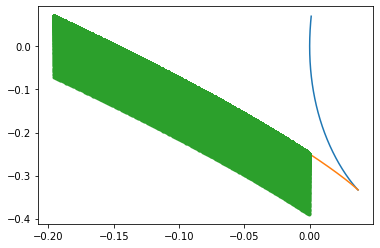

In [2]:
sys_pars = {'alpha_1': 0.15,
            'beta_1': 0.15,
            'alpha_2': 0.15,
            'beta_2': 0.15,
            'gamma': 23500.,
            'Ch_inv': 4.5E10,
            'Lb_inv': 1.E-4,
            'Lg_inv': 1/82.,
            'Rb': 5E6,
            'Rh': 6E5,
            'V_ext': 0.,
            'dV_ext': 0.,
            'noise': 0.,
            'envelope': 0.,
            'noise_fraction_beta_1': 0.1,
            'noise_fraction_env': 0.1,
            's_f': 44100.,
            'steps_per_sample': 20
            }

vocal_pars = {'sys': sys_pars,
              'S_1': 0.2,
              'S_2': 0.2,
              'S_3': 0.2,
              'l_1': 1.5,
              'l_2': 1.5,
              'l_3': 1.0,
              'r_out': 0.1,
              'r_12': None,
              'r_21': None,
              'r_23': None,
              'r_32': None,
              't_12': None,
              't_21': None,
              't_23': None,
              't_32': None,
              't_in': 0.5,
              'tau_1': None,
              'tau_2': None,
              'tau_3': None,
              'max_tau': None,
              'A_1': 0.,
              'A_2': None,
              'A_3': None}

#lines, ab_g= tk.cusp_grid()
lines, ab_g = tk.cusp_grid(b_max=0.07, b_min=-1/3 , a_step=1E-3, b_steps=500, b_log_step_exp=5, f_max=None)
plt.plot(lines[:,1], lines[:,0])
plt.plot(lines[:,2], lines[:,0])
plt.plot(ab_g[:,0], ab_g[:,1], '.')

### Same, but for a region that is wider in the beta parameter 
(beta controls more directly the fundamental frequency)

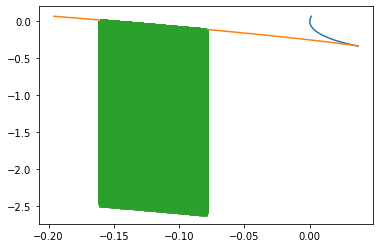

In [3]:
# upper line
plt.plot(lines[:,1], lines[:,0])
# lower line
plt.plot(lines[:,2], lines[:,0])
#get values that are a<0, b<lowerline

def cusp_grid(b_span, b_steps, a_max=-.08, a_min=-0.16, a_step=1e-3, b_log_step_exp=2):
    lines = tk.cusp_lines(step=a_step)
    b_sweep = np.logspace(0, b_log_step_exp, b_steps) * b_span  / (10 ** (b_log_step_exp))
    ab_grid = []
    for a in np.linspace(a_max, a_min, int(abs(a_max - a_min)/a_step)):
        b_m = lines[np.where(lines[:,2] < a)[0][0], 0]
        for b in b_sweep:
            ab_grid.append([a, b_m - b])
        
    return b_sweep, np.array(ab_grid)
        
l, abg = cusp_grid(2.5, 2000)
plt.plot(np.array(abg)[:,0], np.array(abg)[:,1], '*');

In [4]:
abg.shape

(160000, 2)

### Pick one pair a, b and make a synthetic song segment

In [5]:
alpha = -0.15
beta = -1.5

sim_pars = {'gamma': 23500,
            'alpha':alpha,
            'beta': beta,
            'vocal_pars': vocal_pars,
            'sim_samples': 3300,
            's_f': 33000.,
            'steps_per_sample': 20,
            'x_0': np.array([5.E-12, 1.E-11, 1.E-12, 1.E-11, 1.E-12])
           }


alpha_values = sim_pars['alpha'] * np.ones(sim_pars['sim_samples'])
beta_values = sim_pars['beta'] * np.ones(sim_pars['sim_samples'])
env_values = np.ones(sim_pars['sim_samples'])*100
par_stream = np.array([alpha_values, beta_values, env_values]).T
for key in ['alpha', 'beta', 'gamma', 's_f', 'steps_per_sample']:
    vocal_pars['sys'][key] = sim_pars[key]
song_synth = zf.finch(vocal_pars, par_stream, x_0=sim_pars['x_0'])

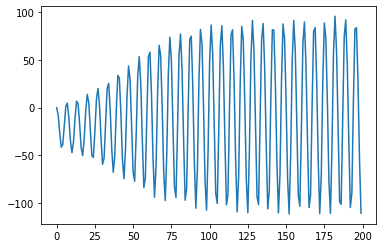

In [7]:
plt.plot(song_synth[:200, 1])

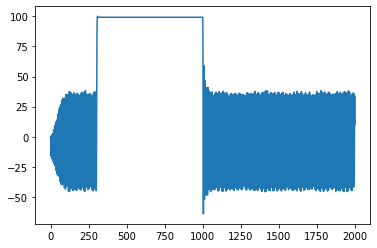

In [11]:
par_stream[300:1000, 0] = 0.15
par_stream[300:1000, 1] = 0

song_synth = zf.finch(vocal_pars, par_stream, x_0=sim_pars['x_0'])
plt.plot(song_synth[:2000, 1])

In [18]:
song_synth.shape

(3300, 2)

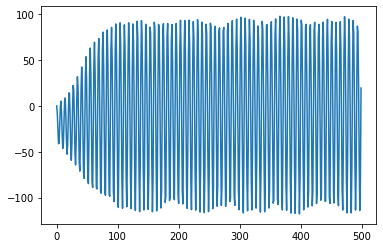

In [19]:
plt.plot(song_synth[:500,1])

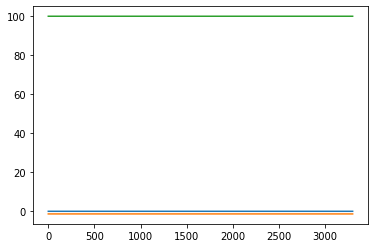

In [20]:
plt.plot(par_stream);

## Run parallel integration of the model
 - All parameters are fixed but the apha/beta
 - Runs many threads, each to a different h5 file, and then merges them onto a single file

In [120]:
sweep_name = 'sweep_001'
sweep_file_path = os.path.join(es.file_names('')['folders']['tmp'], 'syn_sweeps', 'finch_00.h5')

sim_pars = {'sweep_name' : sweep_name,
            'gamma': 23500,
            'alpha': 0.,
            'beta': 0.,
            'vocal_pars': vocal_pars,
            'sim_samples': 4410,
            's_f': 44100.,
            'steps_per_sample': 20,
            'x_0': np.array([5.E-12, 1.E-11, 1.E-12, 1.E-11, 1.E-12])
           }

#s.mkdir_p(os.path.split(h5_path)[0])


@h5tools.h5_decorator(leave_open=False)
def sweep_to_file(h5_path, ab_list, sim_pars, mode='x'):
    logger.info('Sweeping {0} values of alpha, beta with g={1} to file {2}'.format(
            ab_list.shape[0], sim_pars['gamma'], h5_path))
    try:
        total_sim = ab_list.shape[0]
        count = 0
        round_count = 0
        
        for sim_pars['alpha'], sim_pars['beta'] in np.nditer([ab_list[:,0], ab_list[:,1]]):
            if round_count==0:
                logger.info('Simulating {0}/{1} with {0}, {1}'.format(count,
                                                                  total_sim, 
                                                                  sim_pars['alpha'],
                                                                  sim_pars['beta']))
                round_count = 50
                count+=50
            sim_and_store(sim_pars, h5_path)
            round_count-=1
        logger.info('Sweep done successfully')
    except UnboundLocalError, err:
        last_err = err
        logger.error(err)

# An attempt to run in parallel and write to the same file.
# Failed; h5 doesn't play well with mpi.
        
# def parallel_sweep(h5_path, ab_list, sim_pars, mode='x', threads=1):
#     es.mkdir_p(os.path.split(h5_path)[0])
#     logger.info('Sweeping {0} values of alpha, beta with g={1} to file {2} in {3} threads'.format(
#             ab_list.shape[0], sim_pars['gamma'], h5_path, threads))
#     try:
#         sweep_threads = []
#         f = h5py.File(h5_path, mode, driver='mpio', comm=MPI.COMM_WORLD)
#         for chunk in chunkify(range(ab_list.shape[0]), threads):
#             a_sweep = td.threadedFunction(args=(sweep_to_file,
#                                                 f,
#                                                 ab_list[chunk, :],
#                                                 sim_pars))
#             a_sweep.start()
#             sweep_threads.append(a_sweep)
#         logger.info('Parallel sweep done successfully')
#     except UnboundLocalError, err:
#         f.close()
#         last_err = err
#         logger.error(err)
        
def parallel_files_sweep(h5_path, ab_list, sim_pars, mode='x', threads=1):
    file_path = os.path.split(h5_path)[0]
    file_name = os.path.split(h5_path)[-1]
    
    es.mkdir_p(file_path)
    logger.info('Sweeping {0} values of alpha, beta with g={1} to file {2} in {3} threads'.format(
            ab_list.shape[0], sim_pars['gamma'], h5_path, threads))
    try:
        sweep_threads = []
        sim_pars_base = []
        for i_chunk, chunk in enumerate(chunkify(range(ab_list.shape[0]), threads)):
            f_chunk_path = os.path.join(file_path, file_name + '.{}'.format(i_chunk))
            sim_pars_base.append(copy.deepcopy(sim_pars))
            a_sweep = td.threadedFunction(args=(sweep_to_file,
                                                f_chunk_path,
                                                ab_list[chunk, :],
                                                sim_pars_base[i_chunk]),
                                         kwargs = {'mode':mode})
            a_sweep.start()
            sweep_threads.append(a_sweep)
        logger.info('Parallel sweep done successfully')
    except UnboundLocalError, err:
        f.close()
        last_err = err
        logger.error(err)
    

par_list = np.array([np.linspace(-.15, -.3, 2), np.linspace(0, -.5, 2)]).T
#sweep_to_file(sweep_file_path, ab_g, sim_pars, mode='a')
#parallel_sweep(sweep_file_path, ab_g, sim_pars, mode='a')


In [121]:
log_path = os.path.split(sweep_file_path)[0]
log_file = os.path.split(sweep_file_path)[1].split('.')[0] + '.log'
log_file_path = os.path.join(log_path, log_file)


#handler = logging.StreamHandler()
handler = logging.FileHandler(log_file_path)
formatter = logging.Formatter(
        '%(asctime)s %(name)-12s %(levelname)-8s (%(threadName)-10s) %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)
logger.setLevel(logging.INFO)

In [122]:
parallel_files_sweep(sweep_file_path, abg, sim_pars, mode='a', threads=6)

Process threadedFunction-1:


In [5]:
logger.debug('tu vieja')

2016-10-20 10:46:44,975 simulate     DEBUG    tu vieja


In [46]:
sweep_file_path = os.path.join(es.file_names('')['folders']['tmp'], 'syn_sweeps', 'finch_02.h5')

#with h5py.File(sweep_file_path, 'a', driver='mpio', comm=MPI.COMM_WORLD) as sweep_file:
    
sweep_file = h5py.File(sweep_file_path, 'a', driver='mpio', comm=MPI.COMM_WORLD)
threaded_sweep = td.threadedFunction(args=(sweep_to_file, sweep_file, par_list, sim_pars))
threaded_sweep.start()

2016-10-19 18:30:35,424 h5tools      INFO     Starting function file_checker in thread Thread-25
2016-10-19 18:30:35,429 h5tools      DEBUG    leave open False
2016-10-19 18:30:35,431 h5tools      DEBUG    mode r


<HDF5 file "finch_02.h5" (mode r+)>
[[-0.15  0.  ]
 [-0.3  -0.5 ]]
{'beta': array(0.0), 'vocal_pars': {'S_1': 0.2, 'S_3': 0.2, 'S_2': 0.2, 't_21': 1.0, 't_23': 1.0, 'r_12': 0.0, 'r_out': 0.1, 'r_32': 0.0, 'l_2': 1.5, 'l_3': 1.0, 'l_1': 1.5, 'A_3': None, 'A_2': None, 'A_1': 0.96862672249878645, 't_in': 0.5, 'r_23': 0.0, 'r_21': 0.0, 'sys': {'beta_1': -0.41897052472084306, 'V_ext': 5362.0835480047654, 'beta_2': 0.15, 'dV_ext': 701095026.98225522, 'noise_fraction_beta_1': 0.1, 'Rh': 600000.0, 's_f': 44100.0, 'envelope': 1.0, 'beta': array(-0.5), 'noise_fraction_env': 0.1, 'steps_per_sample': 20, 'noise': array([-0.31373278, -1.62058951]), 'alpha_2': 0.15, 'Rb': 5000000.0, 'alpha_1': -0.29999999999999999, 'alpha': array(-0.3), 'Ch_inv': 45000000000.0, 'Lb_inv': 0.0001, 'Lg_inv': 0.012195121951219513, 'gamma': 23500}, 't_32': 1.0, 't_12': 1.0, 'tau_2': 37, 'tau_3': 25, 'max_tau': 37, 'tau_1': 37}, 'x_0': array([  5.00000000e-12,   1.00000000e-11,   1.00000000e-12,
         1.00000000e-11,  

2016-10-19 18:30:35,434 root         INFO     Sweeping 2 values of alpha, beta with g=23500 to file <HDF5 file "finch_02.h5" (mode r+)>
2016-10-19 18:30:35,436 root         INFO     Simulating with -0.15, 0.0
2016-10-19 18:30:35,439 h5tools      DEBUG    Translating dictionary key vocal_pars into its own group
2016-10-19 18:30:35,445 h5tools      DEBUG    Translating dictionary key sys into its own group
2016-10-19 18:30:35,453 tables       INFO     Creating unbounded table /sweep_000/synth/23500 in group alpha_beta
2016-10-19 18:30:39,039 tables       INFO     Creating unbounded table /sweep_000/synth/23500 in group pre_in
2016-10-19 18:30:39,040 tables       INFO     Creating unbounded table /sweep_000/synth/23500 in group pre_out
2016-10-19 18:30:39,042 root         INFO     Simulating with -0.3, -0.5
2016-10-19 18:30:39,042 h5tools      DEBUG    Translating dictionary key vocal_pars into its own group
2016-10-19 18:30:39,043 h5tools      DEBUG    Unable to create group (Name alread

In [5]:
es.file_names('')['folders']

{'kai': '/mnt/cube/kai/results/',
 'prb': '/mnt/cube/earneodo/bci_zf/probes',
 'raw': '/usr/local/experiment/raw_data/',
 'rw': '/mnt/cube/earneodo/bci_zf/raw_data/',
 'ss': '/mnt/cube/earneodo/bci_zf/ss_data/',
 'stim': '/mnt/cube/earneodo/bci_zf/stim_data/',
 'templ': '/mnt/cube/earneodo/bci_zf/templates',
 'tmp': '/usr/local/experiment/tmp_data/'}

In [12]:
for i_chunk, chunk in enumerate(chunkify(range(ab_g.shape[0]), 2)):
    print i_chunk
    #f_chunk_path = os.path.join(file_path, file_name + '.{}'.i_chunk)

0
1


In [10]:
ab_g.shape[0]/8

19937.5